# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset.

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Inspect the shapes of the datasets
# Check the shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
# Convert integer labels to one-hot vectors
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print(y_train_cat.shape)  # (60000, 10)
print(y_test_cat.shape)   # (10000, 10)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
(60000, 10)
(10000, 10)


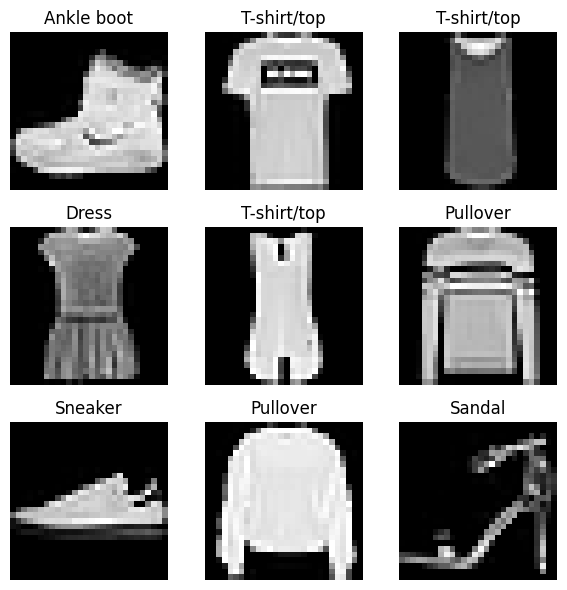

In [4]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
# Verify the data looks as expected

fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')  # show the i-th image in grayscale
    ax.set_title(class_names[y_train[i]])  # show the label
    ax.axis('off')  # hide the axes

plt.tight_layout()
plt.show()



In [5]:
print("X_train shape:", X_train.shape)  # Expected: (60000, 28, 28)
print("y_train shape:", y_train.shape)  # Expected: (60000,)
print("X_test shape:", X_test.shape)    # Expected: (10000, 28, 28)
print("y_test shape:", y_test.shape)    # Expected: (10000,)


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [6]:
print("Pixel value range in X_train:", X_train.min(), "to", X_train.max())


Pixel value range in X_train: 0.0 to 1.0


Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**
Yes. The quality of the images is not good, it might be the issue related to the dataset.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Flatten,Input, Dot

# Create a simple linear regression model
model = Sequential()
# Add layers one by one
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 image
model.add(Dense(10))                       # Output layer: 10 units, no activation

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data=(X_test, y_test))

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.3f}")

# You can use `model.add(<layer>)` to add layers to the model

# Compile the model using `model.compile()`

# Train the model with `model.fit()`

# Evaluate the model with `model.evaluate()`

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4003 - loss: 2.6649 - val_accuracy: 0.3631 - val_loss: 2.3043
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3682 - loss: 2.3018 - val_accuracy: 0.3284 - val_loss: 2.3043
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3267 - loss: 2.3020 - val_accuracy: 0.3286 - val_loss: 2.3043
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3291 - loss: 2.3021 - val_accuracy: 0.3286 - val_loss: 2.3043
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3278 - loss: 2.3021 - val_accuracy: 0.3288 - val_loss: 2.3043
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3377 - loss: 2.3002 - val_accuracy: 0.3192 - val_loss: 2.3045
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3185 - loss: 2.3021 - val_accuracy: 0.3205 - val_loss: 2.3043
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3359 - loss: 2.2899 - 

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten,Input, Dot

# Create a simple linear regression model
model = Sequential()
# Add layers one by one
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 image
model.add(Dense(32))
model.add(Dense(10))                       # Output layer: 10 units, no activation

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data=(X_test, y_test))

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.3f}")

# You can use `model.add(<layer>)` to add layers to the model

# Compile the model using `model.compile()`

# Train the model with `model.fit()`

# Evaluate the model with `model.evaluate()`

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1858 - loss: 1.8497 - val_accuracy: 0.1720 - val_loss: 1.8154
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1255 - loss: 1.8823 - val_accuracy: 0.1457 - val_loss: 1.8669
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1348 - loss: 1.9047 - val_accuracy: 0.1163 - val_loss: 1.9251
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1096 - loss: 1.8365 - val_accuracy: 0.1099 - val_loss: 1.6845
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1480 - loss: 1.7181 - val_accuracy: 0.1510 - val_loss: 1.6895
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1322 - loss: 1.6901 - val_accuracy: 0.1561 - val_loss: 1.7951
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1567 - loss: 1.7505 - val_accuracy: 0.3337 - val_loss: 1.6820
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3815 - loss: 1.5393 - 

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**

The accuracy is low because the model does not include an activation function, which would help improve its performance.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [18]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))                                # pooling layer
model.add(Flatten())                                                      # flatten to 1D
model.add(Dense(10, activation='softmax'))

#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.3f}")


Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.7998 - loss: 0.5698 - val_accuracy: 0.8724 - val_loss: 0.3633
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.8859 - loss: 0.3268 - val_accuracy: 0.8855 - val_loss: 0.3191
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.9044 - loss: 0.2719 - val_accuracy: 0.8986 - val_loss: 0.2923
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.9106 - loss: 0.2519 - val_accuracy: 0.8940 - val_loss: 0.2913
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.9204 - loss: 0.2258 - val_accuracy: 0.8996 - val_loss: 0.2780
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.9257 - loss: 0.2053 - val_accuracy: 0.8985 - val_loss: 0.2817
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.9310 - loss: 0.1953 - val_accuracy: 0.9065 - val_loss: 0.2673
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.9361 - loss: 0

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**

Yes, it is improved at most by 5 times. The reason is including the activation.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [21]:
# A. Test Hyperparameters

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Prepare data (already normalized)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

filters_list = [32, 64, 128]  # hyperparameter: number of filters

for filters in filters_list:
    print(f"\n🔹 Testing model with {filters} filters and Dropout")

    model = Sequential()
    model.add(Conv2D(filters, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))  # regularization
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=5, batch_size=64,
                        validation_data=(X_test, y_test), verbose=1)

    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test Accuracy with {filters} filters: {test_acc:.3f}")



🔹 Testing model with 32 filters and Dropout
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.7710 - loss: 0.6842 - val_accuracy: 0.8623 - val_loss: 0.3929
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.8743 - loss: 0.3613 - val_accuracy: 0.8770 - val_loss: 0.3441
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8874 - loss: 0.3181 - val_accuracy: 0.8834 - val_loss: 0.3255
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.8954 - loss: 0.3023 - val_accuracy: 0.8920 - val_loss: 0.3064
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.8954 - loss: 0.2937 - val_accuracy: 0.8947 - val_loss: 0.2953
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8977 - loss: 0.2965
Test Accuracy with 32 filters: 0.895

🔹 Testing model with 64 filters and Dropout
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.7828 - loss: 0.6323 - val_accuracy: 0.8661 - val_loss: 0.3815
Epoch 2/5
938/938 ━━━━━━

In [7]:
# B. Test presence or absence of regularization

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Prepare data (already normalized)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

filters_list = [32, 64, 128]  # hyperparameter: number of filters

for filters in filters_list:
    print(f"\n🔹 Testing model with {filters} filters and witout Dropout")

    model = Sequential()
    model.add(Conv2D(filters, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=5, batch_size=64,
                        validation_data=(X_test, y_test), verbose=1)

    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test Accuracy with {filters} filters: {test_acc:.3f}")



🔹 Testing model with 32 filters and witout Dropout


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.7754 - loss: 0.6615 - val_accuracy: 0.8681 - val_loss: 0.3841
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.8764 - loss: 0.3507 - val_accuracy: 0.8823 - val_loss: 0.3376
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.8928 - loss: 0.3064 - val_accuracy: 0.8781 - val_loss: 0.3357
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9018 - loss: 0.2839 - val_accuracy: 0.8891 - val_loss: 0.3120
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9070 - loss: 0.2626 - val_accuracy: 0.8942 - val_loss: 0.2920
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8989 - loss: 0.2942
Test Accuracy with 32 filters: 0.894

🔹 Testing model with 64 filters and witout Dropout
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.7859 - loss: 0.6131 - val_accuracy: 0.8774 - val_loss: 0.3505
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accurac

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**

Yes.The model with 128 filters without dropout achieved the highest accuracy. However, this may indicate that the model is overfitting — it memorizes the training data rather than learning general patterns.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # regularization                               # pooling layer
model.add(Flatten())                                                      # flatten to 1D
model.add(Dense(10, activation='softmax'))

#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.3f}")



Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 90s 30ms/step - accuracy: 0.8191 - loss: 0.5123 - val_accuracy: 0.8868 - val_loss: 0.3199
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 87s 29ms/step - accuracy: 0.8958 - loss: 0.2912 - val_accuracy: 0.8828 - val_loss: 0.3107
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 142s 29ms/step - accuracy: 0.9068 - loss: 0.2570 - val_accuracy: 0.8975 - val_loss: 0.2821
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 88s 29ms/step - accuracy: 0.9161 - loss: 0.2306 - val_accuracy: 0.9029 - val_loss: 0.2794
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 88s 29ms/step - accuracy: 0.9241 - loss: 0.2079 - val_accuracy: 0.9021 - val_loss: 0.2771
Epoch 6/10


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**

It is the most accurate method due to using 128 filters and dropout.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.